DATASET: https://www.kaggle.com/datasets/ivansher/nasa-nearest-earth-objects-1910-2024/discussion?sort=hotness

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('nearest-earth-objects(1910-2024).csv')

In [3]:
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [33]:
df['orbiting_body'].unique()

array(['Earth'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [4]:
df.isna().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [6]:
def percent_missing(data):
    perc_missing = (100 * df.isnull().sum()/len(df))
    return perc_missing[perc_missing > 0].sort_values()

In [7]:
percent_missing(df)

absolute_magnitude        0.008279
estimated_diameter_min    0.008279
estimated_diameter_max    0.008279
dtype: float64

In [11]:
type(df['estimated_diameter_max'][0])

numpy.float64

In [12]:
df['estimated_diameter_max'] = df['estimated_diameter_max'].fillna(0)
df['absolute_magnitude'] = df['absolute_magnitude'].fillna(0)
df['estimated_diameter_min'] = df['estimated_diameter_min'].fillna(0)

In [13]:
df.isna().sum()

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

<Axes: xlabel='is_hazardous', ylabel='count'>

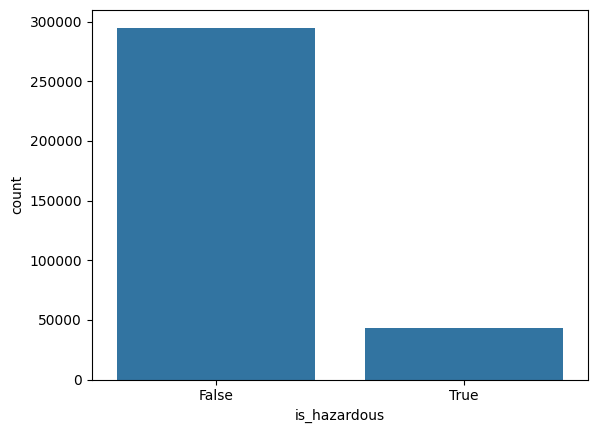

In [14]:
sns.countplot(data=df, x='is_hazardous')

In [62]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier



In [36]:
df.columns

Index(['neo_id', 'absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'orbiting_body', 'relative_velocity',
       'miss_distance', 'is_hazardous'],
      dtype='object')

In [39]:
features = ['neo_id', 'absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']

In [40]:
X = df[features]

In [41]:
y = df['is_hazardous']

In [43]:
# help(train_test_split)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [45]:
rfc = RandomForestClassifier()

In [55]:
# help(RandomForestClassifier)

In [56]:
"""(n_estimators=100, *, 
criterion='gini', max_depth=None, min_samples_split=2, 
min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, 
max_samples=None, monotonic_cst=None"""

"(n_estimators=100, *, \ncriterion='gini', max_depth=None, min_samples_split=2, \nmin_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', \nmax_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, \nn_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, \nmax_samples=None, monotonic_cst=None"

In [58]:
params_grid = {'n_estimators':[10, 30, 40, 70, 100, 150], 'criterion':['gini', 'entropy', 'log_loss']}

In [46]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
y_preds = rfc.predict(X_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [63]:
scores = cross_val_score(rfc, X_train, y_train, cv=5)

In [64]:
abs(scores.mean())

np.float64(0.9738952993864949)

In [50]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       False       0.98      0.99      0.99     88564
        True       0.95      0.88      0.91     12896

    accuracy                           0.98    101460
   macro avg       0.96      0.93      0.95    101460
weighted avg       0.98      0.98      0.98    101460



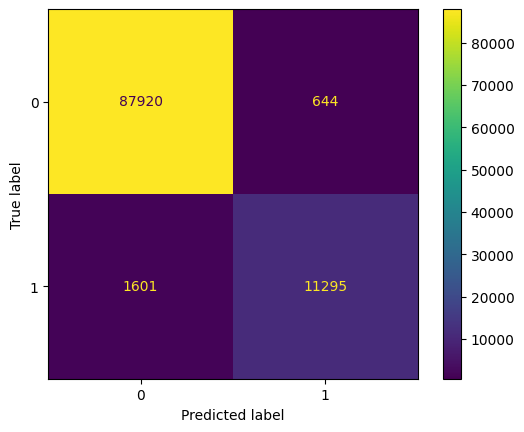

In [60]:
cm = confusion_matrix(y_test, y_preds)
fig = ConfusionMatrixDisplay(confusion_matrix=cm)
fig.plot()